In [3]:
# Fig0020, Corresponds to Fig. 1 and S1

from mylib.statistic_test import *
from matplotlib.gridspec import GridSpec

code_id = '0020 - Learning Curve'
loc = os.path.join(figpath, code_id)
mkdir(loc)
pass

d:\Software\Anaconda3\envs\maze\lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


        D:\Data\FinalResults\0020 - Learning Curve is already existed!


# Lap-wise Time

100%|██████████| 728/728 [00:47<00:00, 15.32it/s] 


8031
234
First Lap Time:
  Mean: 1983.1803333333335, STD: 763.3520993413779, Max: 2936.753, Min: 929.919, Median: 1864.9189999999999, df: 5


d:\Software\Anaconda3\envs\maze\lib\site-packages\numpy\core\fromnumeric.py:3504: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
d:\Software\Anaconda3\envs\maze\lib\site-packages\numpy\core\_methods.py:129: RuntimeWarning: invalid value encountered in scalar divide
  ret = ret.dtype.type(ret / rcount)


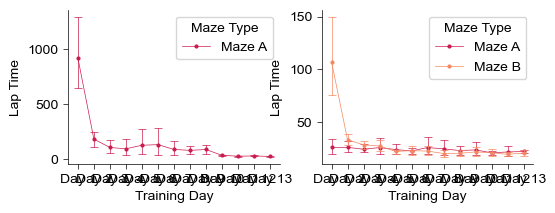

In [14]:
# Generate Data for Plotting. Data will also be saved as an excel file.
if os.path.exists(join(figdata, f'{code_id} [Time].pkl')) == False:
    TimeData = {
        "MiceID": [],
        "Stage": [],
        "Maze Type": [],
        'Training Day': [],
        "Lap": [],
        "Lap Time": [],
        "Mean Speed": [],
        "Distance": []
    }
    for i in tqdm(range(len(f1))):
        # Only analyze Maze A (1) and B (2) and several mice. 
        # Behavioral paradigm of other mice are not exactly the same as these mice.
        if f1['maze_type'][i] == 0 or f1['MiceID'][i] not in [10209, 10212, 10224, 10227, 10232, 10234] or f1['include'][i] == 0:
            continue 
        
        with open(join(f1['Trace File'][i]), 'rb') as handle:
            trace = pickle.load(handle)
            
        beg, end = LapSplit(trace, 'CrossMaze')

        for j in range(len(beg)):
        
            maze_type = 'Maze A' if f1['maze_type'][i] == 1 else 'Maze B'
            TimeData['MiceID'].append(int(f1['MiceID'][i]))
            TimeData['Stage'].append(f1['Stage'][i])
            TimeData['Training Day'].append(f1['training_day'][i])
            TimeData['Maze Type'].append(maze_type)
            TimeData['Lap'].append(j)
            t = (trace['correct_time'][end[j]] - trace['correct_time'][beg[j]])/1000
            TimeData['Lap Time'].append(t)  # Convert to seconds
            
            dp = np.diff(trace['correct_pos'][beg[j]:end[j]+1, :], axis=0)/10
            l = np.sum(np.sqrt(np.sum(dp**2, axis=1))) # Lap Distance
            speed = l / t  # Speed in cm/s
            TimeData['Mean Speed'].append(speed)
            TimeData['Distance'].append(l)  # Distance in cm
        
    for key in TimeData.keys():
        TimeData[key] = np.array(TimeData[key])
            
    with open(join(figdata, f'{code_id} [Time].pkl'), 'wb') as handle:
        pickle.dump(TimeData, handle)
    
    TimeD = pd.DataFrame(TimeData)
    TimeD.to_excel(join(figdata, f'{code_id} [Time].xlsx'), index=False)
    print(len(TimeD))
    
    # Calculate Lap-average Time and Speed.        
    LapAvgTime = {
        "MiceID": [],
        "Lap Time": [],
        "Stage": [],
        "Training Day": [],
        "Mean Speed": [],
        "Maze Type": []
    }
    for mouse in [10209, 10212, 10224, 10227, 10232, 10234]:
        for stage in ['Stage 1', 'Stage 2']:
            for day in [f'Day {i}' for i in range(1, 14)]:
                idx = np.where(
                    (TimeData['MiceID'] == mouse)&
                    (TimeData['Stage'] == stage)&
                    (TimeData['Training Day'] == day) &
                    (TimeData['Maze Type'] == 'Maze A')
                )[0]

                LapAvgTime['MiceID'].append(mouse)
                LapAvgTime['Stage'].append(stage)
                LapAvgTime['Training Day'].append(day)
                LapAvgTime['Maze Type'].append('Maze A')
                LapAvgTime['Lap Time'].append(np.mean(TimeData['Lap Time'][idx]))
                LapAvgTime['Mean Speed'].append(np.mean(TimeData['Mean Speed'][idx]))

                if stage == 'Stage 1':
                    continue

                idx = np.where(
                    (TimeData['MiceID'] == mouse)&
                    (TimeData['Stage'] == stage)&
                    (TimeData['Training Day'] == day) &
                    (TimeData['Maze Type'] == 'Maze B')
                )[0]

                LapAvgTime['MiceID'].append(mouse)
                LapAvgTime['Stage'].append(stage)
                LapAvgTime['Training Day'].append(day)
                LapAvgTime['Maze Type'].append('Maze B')
                LapAvgTime['Lap Time'].append(np.mean(TimeData['Lap Time'][idx]))
                LapAvgTime['Mean Speed'].append(np.mean(TimeData['Mean Speed'][idx]))

    for k in LapAvgTime.keys():
        LapAvgTime[k] = np.array(LapAvgTime[k])

    with open(join(figdata, f'{code_id} [Time Lap Average].pkl'), 'wb') as handle:
        pickle.dump(LapAvgTime, handle)

    LapAvgTimeDF = pd.DataFrame(LapAvgTime)
    LapAvgTimeDF.to_excel(join(figdata, f'{code_id} [Time Lap Average].xlsx'), index=False)
    print(len(LapAvgTimeDF))
else:
    with open(join(figdata, f'{code_id} [Time].pkl'), 'rb') as handle:
        TimeData = pickle.load(handle)

    with open(join(figdata, f'{code_id} [Time Lap Average].pkl'), 'rb') as handle:
        LapAvgTime = pickle.load(handle)

stage1_data = SubDict(
    TimeData,
    TimeData.keys(),
    np.where(TimeData['Stage'] == 'Stage 1')[0]
)
stage2_data = SubDict(
    TimeData,
    TimeData.keys(),
    np.where(TimeData['Stage'] == 'Stage 2')[0]
)
first_lap = stage1_data['Lap Time'][np.where((stage1_data['Lap'] == 0)&(stage1_data['Training Day'] == 'Day 1'))[0]]
print("First Lap Time:")
print_estimator(first_lap)

stage1_data_avg = SubDict(
    LapAvgTime,
    LapAvgTime.keys(),
    np.where(LapAvgTime['Stage'] == 'Stage 1')[0]
)
stage2_data_avg = SubDict(
    LapAvgTime,
    LapAvgTime.keys(),
    np.where(LapAvgTime['Stage'] == 'Stage 2')[0]
)
# Adjust Figure Size
fig, axes = plt.subplots(ncols=2, nrows=1, figsize=(6, 2)) # Create 2 figures with 2 columns and 1 row. total size (Width: 6, Height: 2)
ax1 = Clear_Axes(axes[0], close_spines=['top', 'right'], ifxticks=True, ifyticks=True)
# Stage 1 SubFigure
sns.lineplot(
    x = 'Training Day',
    y = 'Lap Time',
    hue = 'Maze Type',
    data = stage1_data_avg,
    palette = [MazePalette[1]],
    ax=ax1,
    linewidth=0.5,
    err_style='bars',
    err_kws={'capsize': 3, 'linewidth': 0.5, 'capthick': 0.5},
    marker='o', # Marker. It can be erased if not needed.
    markersize=3,
    markeredgewidth=0 # If you want to use markers, set markeredgewidth to 0 and adjust markersize to ajust its size.
)
# Stage 2 SubFigure
ax2 = Clear_Axes(axes[1], close_spines=['top', 'right'], ifxticks=True, ifyticks=True)
sns.lineplot(
    x = 'Training Day',
    y = 'Lap Time',
    hue = 'Maze Type',
    data = stage2_data_avg,
    palette = [MazePalette[1], MazePalette[2]],
    ax=ax2,
    linewidth=0.5,
    err_style='bars',
    err_kws={'capsize': 3, 'linewidth': 0.5, 'capthick': 0.5},
    marker='o', # Marker. It can be erased if not needed.
    markersize=3,
    markeredgewidth=0 # If you want to use markers, set markeredgewidth to 0 and adjust markersize to ajust its size.
)
plt.savefig(join(loc, "Lap-wise Time.png"), dpi=600)
plt.savefig(join(loc, "Lap-wise Time.svg"), dpi=600)
plt.show()

C:\Users\Shuyang Yao\AppData\Local\Temp\ipykernel_35772\3789351652.py:41: RuntimeWarning: Mean of empty slice
  mean_m1 = np.nanmean(Time3D_Maze1, axis=2)


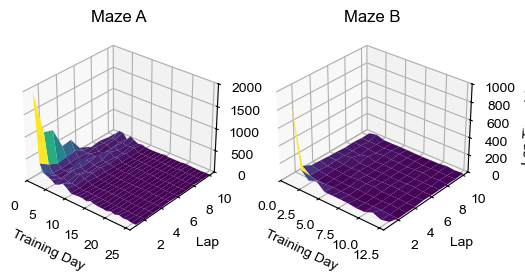

In [16]:
# Plot a lap-session Conjuctive 3D figure
if exists(join(figdata, f'{code_id} [Time 3D].pkl')) == False:
    with open(join(figdata, f'{code_id} [Time].pkl'), 'rb') as handle:
        TimeData = pickle.load(handle)
    
    Time3D_Maze1 = np.zeros((26, 10, 6)) * np.nan 
    Time3D_Maze2 = np.zeros((13, 10, 6)) * np.nan 
    for m, mouse in tqdm(enumerate([10209, 10212, 10224, 10227, 10232, 10234])):
        for stage in range(2):
            for day in range(13):
                for lap in range(10):
                    idx = np.where(
                        (TimeData['MiceID'] == mouse) &
                        (TimeData['Stage'] == f'Stage {stage + 1}') &
                        (TimeData['Training Day'] == f"Day {day + 1}") &
                        (TimeData['Lap'] == lap) & 
                        (TimeData['Maze Type'] == 'Maze A')
                    )[0]
                    
                    if len(idx) == 1:
                        Time3D_Maze1[stage*13 + day, lap, m] = TimeData['Lap Time'][idx[0]]
                    
                    if stage == 1:
                        idx = np.where(
                            (TimeData['MiceID'] == mouse) &
                            (TimeData['Stage'] == f'Stage {stage + 1}') &
                            (TimeData['Training Day'] == f"Day {day + 1}") &
                            (TimeData['Lap'] == lap) & 
                            (TimeData['Maze Type'] == 'Maze B')
                        )[0]
                        
                        if len(idx) == 1:
                            Time3D_Maze2[day, lap, m] = TimeData['Lap Time'][idx[0]]
                    
    with open(join(figdata, f'{code_id} [Time 3D].pkl'), 'wb') as handle:
        pickle.dump([Time3D_Maze1, Time3D_Maze2], handle)
else:
    with open(join(figdata, f'{code_id} [Time 3D].pkl'), 'rb') as handle:
        Time3D_Maze1, Time3D_Maze2 = pickle.load(handle)

mean_m1 = np.nanmean(Time3D_Maze1, axis=2)
mean_m2 = np.nanmean(Time3D_Maze2, axis=2)

S1, L1 = np.meshgrid(
    np.arange(1, 27),  # Training Days
    np.arange(1, 11)   # Laps
)
S2, L2 = np.meshgrid(
    np.arange(1, 14),  # Training Days
    np.arange(1, 11)   # Laps
)
# gaussian filter to smooth the surface
from scipy.ndimage import gaussian_filter
#mean_m1 = gaussian_filter(mean_m1, sigma=0.5)
#mean_m2 = gaussian_filter(mean_m2, sigma=0.5)

fig, axes = plt.subplots(ncols=2, nrows=1, figsize=(6, 3), subplot_kw={'projection': '3d'})
ax = axes[0]
ax.plot_surface(
    S1, L1,
    mean_m1.T, 
    cmap='viridis', 
    edgecolor='none'
)
ax.set_xlabel('Training Day')
ax.set_ylabel('Lap')
ax.set_zlabel('Lap Time (s)')
ax.set_title('Maze A')
ax.view_init(30, -50)  
ax.set_zlim(0, 2000)
ax.set_xlim(0, 26)

ax = axes[1]
ax.plot_surface(
    S2, L2,
    mean_m2.T, 
    cmap='viridis', 
    edgecolor='none'
)
ax.set_xlabel('Training Day')
ax.set_ylabel('Lap')
ax.set_zlabel('Lap Time (s)')
ax.set_title('Maze B')
ax.view_init(30, -50)  
ax.set_zlim(0, 1000)
ax.set_xlim(0, 13)
plt.savefig(join(loc, "Lap-wise Time 3D.png"), dpi=600)
plt.savefig(join(loc, "Lap-wise Time 3D.svg"), dpi=600)
plt.show()

# Lap-wise Speed

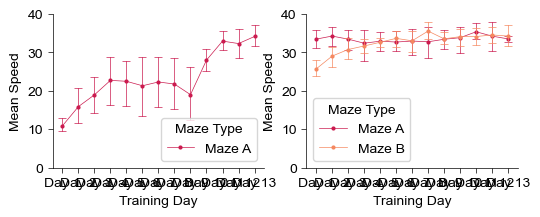

Two-sided Paired t-test to determine increases of Mean Speed:
MA
  Mean: 10.87172973361846, STD: 2.250382486474795, Max: 15.633851392566925, Min: 8.786176069834843, Median: 10.383143327024552, df: 5
  Mean: 33.459101868560545, STD: 1.1202062249039009, Max: 34.818128299740444, Min: 31.474070424275908, Median: 33.83858650241595, df: 5
TtestResult(statistic=-19.913391934944492, pvalue=5.900847607530457e-06, df=5)
MB
  Mean: 25.625203637521945, STD: 2.5767170819146687, Max: 30.943209876789684, Min: 23.065687137208243, Median: 24.653110041524982, df: 5
  Mean: 34.19337897979141, STD: 3.4566698260895423, Max: 39.91230610647444, Min: 30.20372815511609, Median: 33.698863494222955, df: 5
TtestResult(statistic=-3.9212007248473437, pvalue=0.011168517737372404, df=5)


In [18]:
# Adjust Figure Size
fig, axes = plt.subplots(ncols=2, nrows=1, figsize=(6, 2)) # Create 2 figures with 2 columns and 1 row. total size (Width: 6, Height: 2)
ax1 = Clear_Axes(axes[0], close_spines=['top', 'right'], ifxticks=True, ifyticks=True)
# Stage 1 SubFigure
sns.lineplot(
    x = 'Training Day',
    y = 'Mean Speed',
    hue = 'Maze Type',
    data = stage1_data_avg,
    palette = [MazePalette[1]],
    ax=ax1,
    linewidth=0.5,
    err_style='bars',
    err_kws={'capsize': 3, 'linewidth': 0.5, 'capthick': 0.5},
    marker='o', # Marker. It can be erased if not needed.
    markersize=3,
    markeredgewidth=0 # If you want to use markers, set markeredgewidth to 0 and adjust markersize to ajust its size.
)
# Stage 2 SubFigure
ax2 = Clear_Axes(axes[1], close_spines=['top', 'right'], ifxticks=True, ifyticks=True)
sns.lineplot(
    x = 'Training Day',
    y = 'Mean Speed',
    hue = 'Maze Type',
    data = stage2_data_avg,
    palette = [MazePalette[1], MazePalette[2]],
    ax=ax2,
    linewidth=0.5,
    err_style='bars',
    err_kws={'capsize': 3, 'linewidth': 0.5, 'capthick': 0.5},
    marker='o', # Marker. It can be erased if not needed.
    markersize=3,
    markeredgewidth=0 # If you want to use markers, set markeredgewidth to 0 and adjust markersize to ajust its size.
)
ax1.set_ylim(0, 40)
ax2.set_ylim(0, 40)
plt.savefig(join(loc, "Lap-wise Speed.png"), dpi=600)
plt.savefig(join(loc, "Lap-wise Speed.svg"), dpi=600)
plt.show()

# fig. S1 Legend
print("Two-sided Paired t-test to determine increases of Mean Speed:")
idx_m1_s1 = np.where(
    (LapAvgTime['Maze Type'] == 'Maze A') & 
    (LapAvgTime['Training Day'] == 'Day 1') &
    (LapAvgTime['Stage'] == 'Stage 1')
)[0]
idx_m1_s26 = np.where(
    (LapAvgTime['Maze Type'] == 'Maze A') & 
    (LapAvgTime['Training Day'] == 'Day 13') &
    (LapAvgTime['Stage'] == 'Stage 2')
)[0]

print("MA")
print_estimator(LapAvgTime['Mean Speed'][idx_m1_s1])
print_estimator(LapAvgTime['Mean Speed'][idx_m1_s26])
print(ttest_rel(LapAvgTime['Mean Speed'][idx_m1_s1], LapAvgTime['Mean Speed'][idx_m1_s26]))

idx_m2_s1 = np.where(
    (LapAvgTime['Maze Type'] == 'Maze B') & 
    (LapAvgTime['Training Day'] == 'Day 1') &
    (LapAvgTime['Stage'] == 'Stage 2')
)[0]
idx_m2_s13 = np.where(
    (LapAvgTime['Maze Type'] == 'Maze B') & 
    (LapAvgTime['Training Day'] == 'Day 13') &
    (LapAvgTime['Stage'] == 'Stage 2')
)[0]

print("MB")
print_estimator(LapAvgTime['Mean Speed'][idx_m2_s1])
print_estimator(LapAvgTime['Mean Speed'][idx_m2_s13])
print(ttest_rel(LapAvgTime['Mean Speed'][idx_m2_s1], LapAvgTime['Mean Speed'][idx_m2_s13]))

# Correct Spatial Decisions

First Lap Decision Rate: 
  Mean: 0.43014336585095675, STD: 0.01786685803823126, Max: 0.45698166431593795, Min: 0.40041928721174, Median: 0.4301242236024845, df: 5


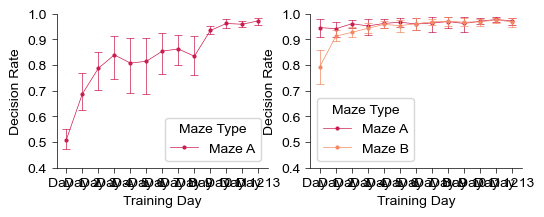

MA:
  Mean: 0.508025708844196, STD: 0.046424609631278375, Max: 0.5973342345162546, Min: 0.4448963284487057, Median: 0.49957814054852545, df: 5
  Mean: 0.9718927288366883, STD: 0.01780175695609885, Max: 0.9886804533186111, Min: 0.9348015663805137, Median: 0.9782683328541844, df: 5
TtestResult(statistic=-19.99918181375816, pvalue=5.776685370805544e-06, df=5)
MB:
  Mean: 0.7942497505460525, STD: 0.0836123144596168, Max: 0.8973784207427812, Min: 0.6776968294825437, Median: 0.8209605260704154, df: 5
  Mean: 0.9684180080118546, STD: 0.02207960140850182, Max: 0.9892091786209434, Min: 0.9296444288153608, Median: 0.9775288965536643, df: 5
TtestResult(statistic=-4.769396308826203, pvalue=0.00501748661582014, df=5)


In [11]:
if exists(join(figdata, f'{code_id} [Spatial Decisions].pkl')) == False:
    DecisionRate = {
        "MiceID": [],
        "Stage": [],
        "Maze Type": [],
        "Training Day": [],
        "Decision Rate": [],
        "Lap": []
    }
    
    for i in tqdm(range(len(f1))):
        if f1['maze_type'][i] == 0 or f1['MiceID'][i] not in [10209, 10212, 10224, 10227, 10232, 10234] or f1['include'][i] == 0:
            continue 
        
        with open(join(f1['Trace File'][i]), 'rb') as handle:
            trace = pickle.load(handle)
            
        decision_rate = lap_wise_decision_rate(trace)

        DecisionRate['MiceID'].append(np.repeat(int(f1['MiceID'][i]), decision_rate.shape[0]))
        DecisionRate['Stage'].append(np.repeat(f1['Stage'][i], decision_rate.shape[0]))
        DecisionRate['Training Day'].append(np.repeat(f1['training_day'][i], decision_rate.shape[0]))
        DecisionRate['Maze Type'].append(np.repeat('Maze A' if f1['maze_type'][i] == 1 else 'Maze B', decision_rate.shape[0]))
        DecisionRate['Decision Rate'].append(decision_rate)
        DecisionRate['Lap'].append(np.arange(decision_rate.shape[0]))
        
    for key in DecisionRate.keys():
        DecisionRate[key] = np.concatenate(DecisionRate[key])
        
    with open(join(figdata, f'{code_id} [Spatial Decisions].pkl'), 'wb') as handle:
        pickle.dump(DecisionRate, handle)
    
    DecisionRateD = pd.DataFrame(DecisionRate)
    DecisionRateD.to_excel(join(figdata, f'{code_id} [Spatial Decisions].xlsx'), index=False)
    print(len(DecisionRateD))

    # Calculate Lap-average Decision-Rate.
    LapAvgDecision = {
        "MiceID": [],
        "Stage": [],
        "Training Day": [],
        "Maze Type": [],
        "Decision Rate": []
    }
    for mouse in [10209, 10212, 10224, 10227, 10232, 10234]:
        for stage in ['Stage 1', 'Stage 2']:
            for day in [f'Day {i}' for i in range(1, 14)]:
                idx = np.where(
                    (DecisionRate['MiceID'] == mouse)&
                    (DecisionRate['Stage'] == stage)&
                    (DecisionRate['Training Day'] == day) &
                    (DecisionRate['Maze Type'] == 'Maze A')
                )[0]

                LapAvgDecision['MiceID'].append(mouse)
                LapAvgDecision['Stage'].append(stage)
                LapAvgDecision['Training Day'].append(day)
                LapAvgDecision['Maze Type'].append('Maze A')
                LapAvgDecision['Decision Rate'].append(np.mean(DecisionRate['Decision Rate'][idx]))

                if stage == 'Stage 1':
                    continue

                idx = np.where(
                    (DecisionRate['MiceID'] == mouse)&
                    (DecisionRate['Stage'] == stage)&
                    (DecisionRate['Training Day'] == day) &
                    (DecisionRate['Maze Type'] == 'Maze B')
                )[0]

                LapAvgDecision['MiceID'].append(mouse)
                LapAvgDecision['Stage'].append(stage)
                LapAvgDecision['Training Day'].append(day)
                LapAvgDecision['Maze Type'].append('Maze B')
                LapAvgDecision['Decision Rate'].append(np.mean(DecisionRate['Decision Rate'][idx]))

    for k in LapAvgDecision.keys():
        LapAvgDecision[k] = np.array(LapAvgDecision[k])

    with open(join(figdata, f'{code_id} [Spatial Decisions Lap Average].pkl'), 'wb') as handle:
        pickle.dump(LapAvgDecision, handle)

    LapAvgDecisionDF = pd.DataFrame(LapAvgDecision)
    LapAvgDecisionDF.to_excel(join(figdata, f'{code_id} [Spatial Decisions Lap Average].xlsx'), index=False)
    print(len(LapAvgDecisionDF))
else:
    with open(join(figdata, f'{code_id} [Spatial Decisions].pkl'), 'rb') as handle:
        DecisionRate = pickle.load(handle)

    with open(join(figdata, f'{code_id} [Spatial Decisions Lap Average].pkl'), 'rb') as handle:
        LapAvgDecision = pickle.load(handle)

stage1_data = SubDict(
    DecisionRate,
    DecisionRate.keys(),
    np.where(DecisionRate['Stage'] == 'Stage 1')[0]
)
stage2_data = SubDict(
    DecisionRate,
    DecisionRate.keys(),
    np.where(DecisionRate['Stage'] == 'Stage 2')[0]
)
idx = np.where((stage1_data['Training Day'] == 'Day 1')&(stage1_data['Lap'] == 0))[0]
print(f"First Lap Decision Rate: ")
print_estimator(stage1_data['Decision Rate'][idx])

stage1_data_avg = SubDict(
    LapAvgDecision,
    LapAvgDecision.keys(),
    np.where(LapAvgDecision['Stage'] == 'Stage 1')[0]
)
stage2_data_avg = SubDict(
    LapAvgDecision,
    LapAvgDecision.keys(),
    np.where(LapAvgDecision['Stage'] == 'Stage 2')[0]
)
fig, axes = plt.subplots(ncols=2, nrows=1, figsize=(6, 2)) # Create 2 figures with 2 columns and 1 row. total size (Width: 6, Height: 2)
ax1 = Clear_Axes(axes[0], close_spines=['top', 'right'], ifxticks=True, ifyticks=True)
# Stage 1 SubFigure
sns.lineplot(
    x = 'Training Day',
    y = 'Decision Rate',
    hue = 'Maze Type',
    data = stage1_data_avg,
    palette = [MazePalette[1]],
    ax=ax1,
    linewidth=0.5,
    err_style='bars',
    err_kws={'capsize': 3, 'linewidth': 0.5, 'capthick': 0.5},
    marker='o', # Marker. It can be erased if not needed.
    markersize=3,
    markeredgewidth=0 # If you want to use markers, set markeredgewidth to 0 and adjust markersize to ajust its size.
)

# Stage 2 SubFigure
ax2 = Clear_Axes(axes[1], close_spines=['top', 'right'], ifxticks=True, ifyticks=True)
sns.lineplot(
    x = 'Training Day',
    y = 'Decision Rate',
    hue = 'Maze Type',
    data = stage2_data_avg,
    palette = [MazePalette[1], MazePalette[2]],
    ax=ax2,
    linewidth=0.5,
    err_style='bars',
    err_kws={'capsize': 3, 'linewidth': 0.5, 'capthick': 0.5},
    marker='o', # Marker. It can be erased if not needed.
    markersize=3,
    markeredgewidth=0 # If you want to use markers, set markeredgewidth to 0 and adjust markersize to ajust its size.
)
ax1.set_ylim(0.4, 1)
ax1.set_yticks(np.linspace(0.4, 1, 7))
ax2.set_ylim(0.4, 1)
ax2.set_yticks(np.linspace(0.4, 1, 7))
plt.savefig(join(loc, "Correct Spatial Decisions.png"), dpi=600)
plt.savefig(join(loc, "Correct Spatial Decisions.svg"), dpi=600)
plt.show()

# Figure 1D Legends
print("MA:")
idx_s1 = np.where((LapAvgDecision['Stage'] == 'Stage 1') & (LapAvgDecision['Training Day'] == 'Day 1') & (LapAvgDecision['Maze Type'] == 'Maze A'))[0]
idx_s26 = np.where((LapAvgDecision['Stage'] == 'Stage 2') & (LapAvgDecision['Training Day'] == 'Day 13') & (LapAvgDecision['Maze Type'] == 'Maze A'))[0]
print_estimator(LapAvgDecision['Decision Rate'][idx_s1])
print_estimator(LapAvgDecision['Decision Rate'][idx_s26])
print(ttest_rel(LapAvgDecision['Decision Rate'][idx_s1], LapAvgDecision['Decision Rate'][idx_s26]))
print("MB:")
idx_s1 = np.where((LapAvgDecision['Stage'] == 'Stage 2') & (LapAvgDecision['Training Day'] == 'Day 1') & (LapAvgDecision['Maze Type'] == 'Maze B'))[0]
idx_s13 = np.where((LapAvgDecision['Stage'] == 'Stage 2') & (LapAvgDecision['Training Day'] == 'Day 13') & (LapAvgDecision['Maze Type'] == 'Maze B'))[0]
print_estimator(LapAvgDecision['Decision Rate'][idx_s1])
print_estimator(LapAvgDecision['Decision Rate'][idx_s13])
print(ttest_rel(LapAvgDecision['Decision Rate'][idx_s1], LapAvgDecision['Decision Rate'][idx_s13]))

C:\Users\Shuyang Yao\AppData\Local\Temp\ipykernel_18676\1780425907.py:41: RuntimeWarning: Mean of empty slice
  mean_m1 = np.nanmean(DecisionRate3D_Maze1, axis=2)
C:\Users\Shuyang Yao\AppData\Local\Temp\ipykernel_18676\1780425907.py:42: RuntimeWarning: Mean of empty slice
  mean_m2 = np.nanmean(DecisionRate3D_Maze2, axis=2)


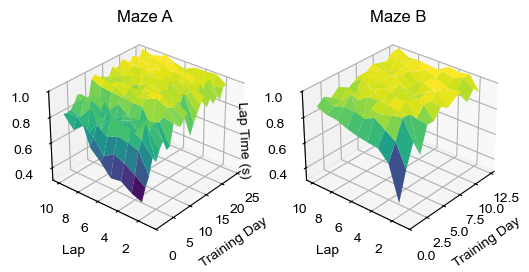

In [31]:
# Plot a lap-session Conjuctive 3D figure
if exists(join(figdata, f'{code_id} [Decision Rate 3D].pkl')) == False:
    with open(join(figdata, f'{code_id} [Spatial Decisions].pkl'), 'rb') as handle:
        DecisionRate = pickle.load(handle)
    
    DecisionRate3D_Maze1 = np.zeros((26, 10, 6)) * np.nan 
    DecisionRate3D_Maze2 = np.zeros((13, 10, 6)) * np.nan 
    for m, mouse in tqdm(enumerate([10209, 10212, 10224, 10227, 10232, 10234])):
        for stage in range(2):
            for day in range(13):
                for lap in range(10):
                    idx = np.where(
                        (DecisionRate['MiceID'] == mouse) &
                        (DecisionRate['Stage'] == f'Stage {stage + 1}') &
                        (DecisionRate['Training Day'] == f"Day {day + 1}") &
                        (DecisionRate['Lap'] == lap) & 
                        (DecisionRate['Maze Type'] == 'Maze A')
                    )[0]
                    
                    if len(idx) == 1:
                        DecisionRate3D_Maze1[stage*13 + day, lap, m] = DecisionRate['Decision Rate'][idx[0]]
                    
                    if stage == 1:
                        idx = np.where(
                            (DecisionRate['MiceID'] == mouse) &
                            (DecisionRate['Stage'] == f'Stage {stage + 1}') &
                            (DecisionRate['Training Day'] == f"Day {day + 1}") &
                            (DecisionRate['Lap'] == lap) & 
                            (DecisionRate['Maze Type'] == 'Maze B')
                        )[0]
                        
                        if len(idx) == 1:
                            DecisionRate3D_Maze2[day, lap, m] = DecisionRate['Decision Rate'][idx[0]]

    with open(join(figdata, f'{code_id} [Decision Rate 3D].pkl'), 'wb') as handle:
        pickle.dump([DecisionRate3D_Maze1, DecisionRate3D_Maze2], handle)
else:
    with open(join(figdata, f'{code_id} [Decision Rate 3D].pkl'), 'rb') as handle:
        DecisionRate3D_Maze1, DecisionRate3D_Maze2 = pickle.load(handle)

mean_m1 = np.nanmean(DecisionRate3D_Maze1, axis=2)
mean_m2 = np.nanmean(DecisionRate3D_Maze2, axis=2)

S1, L1 = np.meshgrid(
    np.arange(1, 27),  # Training Days
    np.arange(1, 11)   # Laps
)
S2, L2 = np.meshgrid(
    np.arange(1, 14),  # Training Days
    np.arange(1, 11)   # Laps
)
# gaussian filter to smooth the surface
from scipy.ndimage import gaussian_filter
#mean_m1 = gaussian_filter(mean_m1, sigma=0.5)
#mean_m2 = gaussian_filter(mean_m2, sigma=0.5)

fig, axes = plt.subplots(ncols=2, nrows=1, figsize=(6, 3), subplot_kw={'projection': '3d'})
ax = axes[0]
ax.plot_surface(
    S1, L1,
    mean_m1.T, 
    cmap='viridis', 
    edgecolor='none'
)
ax.set_xlabel('Training Day')
ax.set_ylabel('Lap')
ax.set_zlabel('Lap Time (s)')
ax.set_title('Maze A')
ax.view_init(30, 220)  
ax.set_zlim(0.3, 1)
ax.set_xlim(0, 26)

ax = axes[1]
ax.plot_surface(
    S2, L2,
    mean_m2.T, 
    cmap='viridis', 
    edgecolor='none'
)
ax.set_xlabel('Training Day')
ax.set_ylabel('Lap')
ax.set_zlabel('Lap Time (s)')
ax.set_title('Maze B')
ax.view_init(30, 220)  
ax.set_zlim(0.3, 1)
ax.set_xlim(0, 13)
plt.savefig(join(loc, "Lap-wise Decision Rate 3D.png"), dpi=600)
plt.savefig(join(loc, "Lap-wise Decision Rate 3D.svg"), dpi=600)
plt.show()

# Behavioral Progress

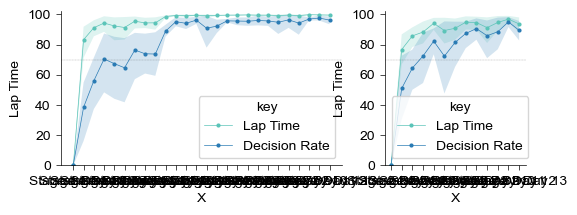

In [ ]:
with open(join(figdata, f'{code_id} [Time Lap Average].pkl'), 'rb') as handle:
    LapAvgTime = pickle.load(handle)
with open(join(figdata, f'{code_id} [Spatial Decisions Lap Average].pkl'), 'rb') as handle:
    LapAvgDecision = pickle.load(handle)

for mouse in [10209, 10212, 10224, 10227, 10232, 10234]:
    for maze in ['Maze A', 'Maze B']:
        idx = np.where((LapAvgTime['MiceID'] == mouse) & (LapAvgTime['Maze Type'] == maze))[0]

        tmin, tmax = np.min(LapAvgTime['Lap Time'][idx]), np.max(LapAvgTime['Lap Time'][idx])
        LapAvgTime['Lap Time'][idx] = (tmax - LapAvgTime['Lap Time'][idx]) / (tmax - tmin) * 100  # Normalize to 0-100%

        vmin, vmax = np.min(LapAvgTime['Mean Speed'][idx]), np.max(LapAvgTime['Mean Speed'][idx])
        LapAvgTime['Mean Speed'][idx] = (LapAvgTime['Mean Speed'][idx] - vmin) / (vmax - vmin) * 100  # Normalize to 0-100%

        idx = np.where((LapAvgDecision['MiceID'] == mouse) & (LapAvgDecision['Maze Type'] == maze))[0]
        dmin, dmax = np.min(LapAvgDecision['Decision Rate'][idx]), np.max(LapAvgDecision['Decision Rate'][idx])
        LapAvgDecision['Decision Rate'][idx] = (LapAvgDecision['Decision Rate'][idx] - dmin) / (dmax - dmin) * 100  # Normalize to 0-100%

LapAvgTime['X'] = np.array([f"{LapAvgTime['Stage'][i]} {LapAvgTime['Training Day'][i]}" for i in range(len(LapAvgTime['Stage']))])
LapAvgDecision['X'] = np.array([f"{LapAvgDecision['Stage'][i]} {LapAvgDecision['Training Day'][i]}" for i in range(len(LapAvgDecision['Stage']))])

maze_a_time = SubDict(
    LapAvgTime,
    LapAvgTime.keys(),
    np.where(LapAvgTime['Maze Type'] == 'Maze A')[0]
)
maze_b_time = SubDict(
    LapAvgTime,
    LapAvgTime.keys(),
    np.where(LapAvgTime['Maze Type'] == 'Maze B')[0]
)
maze_a_decision = SubDict(
    LapAvgDecision,
    LapAvgDecision.keys(),
    np.where(LapAvgDecision['Maze Type'] == 'Maze A')[0]
)
maze_b_decision = SubDict(
    LapAvgDecision,
    LapAvgDecision.keys(),
    np.where(LapAvgDecision['Maze Type'] == 'Maze B')[0]
)

fig, axes = plt.subplots(ncols=2, nrows=1, figsize=(6, 2), gridspec_kw={'width_ratios': [2, 1]})
ax1 = Clear_Axes(axes[0], close_spines=['top', 'right'], ifxticks=True, ifyticks=True)
data = [maze_a_time, maze_a_decision]
key = ['Lap Time', 'Decision Rate']
colors = ['#5bc4b8', '#2a7bb4']
for i, d in enumerate(data):
    d['key'] = np.repeat(key[i], len(d['X']))
    sns.lineplot(
        x = 'X',
        y = key[i],
        hue = 'key',
        data = d,
        palette = [colors[i]],
        ax=ax1,
        linewidth=0.5,
        err_kws={'edgecolor': None},
        #err_style='bars',
        #err_kws={'capsize': 3, 'linewidth': 0.5, 'capthick': 0.5},
        marker='o', # Marker. It can be erased if not needed.
        markersize=3,
        markeredgewidth=0 # If you want to use markers, set markeredgewidth to 0 and adjust markersize to ajust its size.
    )
    
ax1.set_ylim(0, 102)
ax1.set_yticks(np.linspace(0, 100, 6))

ax2 = Clear_Axes(axes[1], close_spines=['top', 'right'], ifxticks=True, ifyticks=True)
data = [maze_b_time, maze_b_decision]
key = ['Lap Time', 'Decision Rate']
for i, d in enumerate(data):
    d['key'] = np.repeat(key[i], len(d['X']))
    sns.lineplot(
        x = 'X',
        y = key[i],
        hue = 'key',
        data = d,
        palette = [colors[i]],
        ax=ax2,
        linewidth=0.5,
        err_kws={'edgecolor': None},
        #err_style='bars',
        #err_kws={'capsize': 3, 'linewidth': 0.5, 'capthick': 0.5},
        marker='o', # Marker. It can be erased if not needed.
        markersize=3,
        markeredgewidth=0 # If you want to use markers, set markeredgewidth to 0 and adjust markersize to ajust its size.
    )
ax2.set_ylim(0, 102)
ax2.set_yticks(np.linspace(0, 100, 6))
ax1.axhline(70, c='k', ls=':', lw=0.2)
ax2.axhline(70, c='k', ls=':', lw=0.2)
plt.savefig(join(loc, "Behavioral Progress.png"), dpi=600)
plt.savefig(join(loc, "Behavioral Progress.svg"), dpi=600)
plt.show()



# Statistics of Behavioral Progress
S1 vs. S4, n = 6

In [24]:
with open(join(figdata, f'{code_id} [Time Lap Average].pkl'), 'rb') as handle:
    LapAvgTime = pickle.load(handle)
with open(join(figdata, f'{code_id} [Spatial Decisions Lap Average].pkl'), 'rb') as handle:
    LapAvgDecision = pickle.load(handle)

time_s1_idx = np.where(
    (LapAvgTime['Training Day'] == 'Day 1') &
    (LapAvgTime['Stage'] == 'Stage 1')
)[0]
time_s4_idx = np.where(
    (LapAvgTime['Training Day'] == 'Day 4') &
    (LapAvgTime['Stage'] == 'Stage 1')
)[0]

time_s1 = LapAvgTime['Lap Time'][time_s1_idx]
time_s4 = LapAvgTime['Lap Time'][time_s4_idx]

decision_s1_idx = np.where(
    (LapAvgDecision['Training Day'] == 'Day 1') &
    (LapAvgDecision['Stage'] == 'Stage 1')
)[0]
decision_s4_idx = np.where(
    (LapAvgDecision['Training Day'] == 'Day 4') &
    (LapAvgDecision['Stage'] == 'Stage 1')
)[0]

decision_s1 = LapAvgDecision['Decision Rate'][decision_s1_idx]
decision_s4 = LapAvgDecision['Decision Rate'][decision_s4_idx]

print_estimator(time_s1)
print_estimator(time_s4)
print(f"Time Paired t-test: {ttest_rel(time_s1, time_s4)}")
print_estimator(decision_s1)
print_estimator(decision_s4)
print(f"Decision Rate Paired t-test: {ttest_rel(decision_s1, decision_s4)}")

  Mean: 921.5443388888889, STD: 418.36587084601604, Max: 1795.1478, Min: 517.6616, Median: 825.6839, df: 5
  Mean: 91.66975576086496, STD: 95.69772259424153, Max: 299.2631, Min: 22.713562500000002, Median: 58.313096638655466, df: 5
Time Paired t-test: TtestResult(statistic=5.525398570915044, pvalue=0.0026607024766927903, df=5)
  Mean: 0.508025708844196, STD: 0.046424609631278375, Max: 0.5973342345162546, Min: 0.4448963284487057, Median: 0.49957814054852545, df: 5
  Mean: 0.8397219170633025, STD: 0.10850315612801419, Max: 0.953536606983824, Min: 0.6184820681098488, Median: 0.858403849526675, df: 5
Decision Rate Paired t-test: TtestResult(statistic=-7.3998782487404045, pvalue=0.0007091689198945407, df=5)


# Highly familir behavior of mice

In [33]:
# Shortest Trajectory
with open(join(figdata, f'{code_id} [Time].pkl'), 'rb') as handle:
    TimeData = pickle.load(handle)

shortest_path_maze_a = np.zeros(6)
shortest_path_maze_b = np.zeros(6)
fastest_speed_maze_a = np.zeros(6)
fastest_speed_maze_b = np.zeros(6)

for i, mouse in enumerate([10209, 10212, 10224, 10227, 10232, 10234]):
    idx = np.where(
        (TimeData['MiceID'] == mouse) &
        (TimeData['Maze Type'] == 'Maze A')
    )
    shortest_path_maze_a[i] = np.min(TimeData['Distance'][idx])
    fastest_speed_maze_a[i] = np.max(TimeData['Mean Speed'][idx])
    idx = np.where(
        (TimeData['MiceID'] == mouse) &
        (TimeData['Maze Type'] == 'Maze B')
    )
    shortest_path_maze_b[i] = np.min(TimeData['Distance'][idx])
    fastest_speed_maze_b[i] = np.max(TimeData['Mean Speed'][idx])

print("Optimized Trajectory Length (cm)")
print_estimator(shortest_path_maze_a)
print_estimator(shortest_path_maze_b)
print("Optimized Speed (cm/s)")
print_estimator(fastest_speed_maze_a)
print_estimator(fastest_speed_maze_b)

# Decision Rate
with open(join(figdata, f'{code_id} [Spatial Decisions Lap Average].pkl'), 'rb') as handle:
    LapAvgDecision = pickle.load(handle)

last_session_maze_a = LapAvgDecision['Decision Rate'][np.where(
    (LapAvgDecision['Stage'] == 'Stage 2') &
    (LapAvgDecision['Training Day'] == 'Day 13') &
    (LapAvgDecision['Maze Type'] == 'Maze A')
)]
last_session_maze_b = LapAvgDecision['Decision Rate'][np.where(
    (LapAvgDecision['Stage'] == 'Stage 2') &
    (LapAvgDecision['Training Day'] == 'Day 13') &
    (LapAvgDecision['Maze Type'] == 'Maze B')
)]
print("Last Decision Rate:")
print_estimator(last_session_maze_a)
print_estimator(last_session_maze_b)

Optimized Trajectory Length (cm)
  Mean: 630.5517092292949, STD: 6.805569628104123, Max: 638.0224169634366, Min: 619.0981993546518, Median: 632.873556700797, df: 5
  Mean: 568.0808769626964, STD: 4.036283486232925, Max: 575.3578970270537, Min: 562.5765766396023, Median: 567.1199956798873, df: 5
Optimized Speed (cm/s)
  Mean: 43.252405572830845, STD: 1.688726268260116, Max: 46.55076030373812, Min: 41.535938799142954, Median: 42.64164384079278, df: 5
  Mean: 43.71888298011893, STD: 1.5110704845061798, Max: 45.07634739967935, Min: 40.57141400066574, Median: 43.94343403903535, df: 5
Last Decision Rate:
  Mean: 0.9718927288366883, STD: 0.01780175695609885, Max: 0.9886804533186111, Min: 0.9348015663805137, Median: 0.9782683328541844, df: 5
  Mean: 0.9684180080118546, STD: 0.02207960140850182, Max: 0.9892091786209434, Min: 0.9296444288153608, Median: 0.9775288965536643, df: 5
